<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic3/Chollet_HFST3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

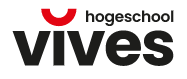<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# **3. Introduction to Keras and TensorFlow**

Deze notebook bevat de codevoorbeelden van paragrafen 3.5 en 3.6 uit hoofdstuk 3 van het boek "Deep Learning with Python" (2e editie) van François Chollet.

## 3.5. First steps with TensorFlow

Om een neuraal netwerk te trainen hebben we de volgende zaken nodig:

- **Low-level** tensormanipulaties = **TensorFlow** API:

  - tensors + variables
  - tensoroperaties (bv. optelling, matrixvermenigvuldiging, activatiefuncties)
  - backpropagation mbv `GradientTape` object

- **High-level** deep learning concepten = **Keras** API
  - modellen (bv. `Sequential`) die bestaan uit lagen (bv. `Dense`)
  - lossfuncties (bv. RMSE)
  - optimizers (bv. RMSprop)
  - evaluatiemetrieken (bv. accuracy)
  - training loop die mini-batch SGD uitvoert

### Constant tensors and variables

In [ ]:
import tensorflow as tf
import numpy as np

Tensoren met enen en nullen:

In [ ]:
x = tf.ones(shape=(2, 1))  # equivalent met np.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
y = tf.zeros(shape=(2, 1))  # equivalent met np.zeros(shape=(2, 1))
print(y)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Random tensors:

In [ ]:
# standaardnormaal verdeelde random getallen
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)  # cfr np.random.normal(size=(3, 1), loc=0., scale=1.)
print(x)

tf.Tensor(
[[ 0.00568367]
 [-1.7573056 ]
 [-0.9852231 ]], shape=(3, 1), dtype=float32)


In [ ]:
# uniform verdeelde random getallen tussen 0 en 1
y = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)  # cfr np.random.uniform(size=(3, 1), low=0., high=1.)
print(y)

tf.Tensor(
[[0.14543247]
 [0.5321984 ]
 [0.9040779 ]], shape=(3, 1), dtype=float32)


Let op! TensorFlow tensoren zijn niet 'assignable':

In [ ]:
try:
    x[0, 0] = 0.
except TypeError as err:  # geeft een TypeError
    print(err)

'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment


Oplossing: TensorFlow variables!

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.1397902 ],
       [-0.7685107 ],
       [ 0.02838375]], dtype=float32)>


Toekenning gebeurt mbv methode `assign`:

In [ ]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [ ]:
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


Methodes `assign_add` en `assign_sub` zijn equivalent met `+=` en `-=`:

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

### Tensor operations: doing math in TensorFlow

In [ ]:
a = 4 * tf.ones((2, 2))
print(a)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
b = tf.square(a)  # kwadraat, cfr np.square()
print(b)

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)


In [ ]:
c = tf.sqrt(a)  # vierkantswortel, cfr np.sqrt()
print(c)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [ ]:
d = b + c  # optelling
print(d)

tf.Tensor(
[[18. 18.]
 [18. 18.]], shape=(2, 2), dtype=float32)


In [ ]:
e = tf.matmul(a, b)  # matrixvermenigvuldiging, cfr np.dot()
print(e)

tf.Tensor(
[[128. 128.]
 [128. 128.]], shape=(2, 2), dtype=float32)


In [ ]:
e *= d  # elementsgewijze vermenigvuldiging
print(e)

tf.Tensor(
[[2304. 2304.]
 [2304. 2304.]], shape=(2, 2), dtype=float32)


Alle bewerkingen worden 'on the fly' uitgevoerd = **eager execution**.

### A second look at the `GradientTape` API

Tot nu toe hebben we nog niks gedaan wat we niet in NumPy kunnen doen. Automatisch gradiënten berekenen van expressies die differentieerbaar zijn is echter iets wat we niet kunnen doen in NumPy maar wel in TensorFlow! We gebruiken hiervoor de `GradientTape`:

In [ ]:
input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)  # afgeleide van x**2 voor x = 3
print(gradient)  # moet 2 * x = 6 geven

tf.Tensor(6.0, shape=(), dtype=float32)


`GradientTape` kan ook toegepast worden op een lijst van inputs en op meerdimensionale tensoren. Bij een neuraal netwerk zullen we de gradient van de loss berekenen tov de gewichten:

> `gradients = tape.gradient(loss, weights)` zijn.

In het voorbeeld hebben we een `Variable` gebruikt. Met een constante tensor lukt het ook, maar dan moeten we `tape.watch()` gebruiken om de tensoroperaties 'op te nemen':

In [ ]:
input_const = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(input_const)  # watch constant
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


Waarom dat 'watchen'? Om resources te sparen! De gradiënt berekenen tov 'trainable variables' is zeer gebruikelijk in deep learning, maar tov constanten niet. Daarom moet je expliciet aangeven dat je de operaties wil 'tracken' waar die constante in betrokken is.

De gradiënt is ook een functie en dus kunnen we de gradiënt van een gradiënt berekenen. Dat lukt ook in TensorFlow.

Neem als voorbeeld de versnelling $a$ die de afgeleide is van de snelheid $v$ naar de tijd $t$, terwijl de snelheid $v$ de afgeleide is van de positie $x$ naar de tijd $t$:

> $x = c t^2$

> $v = \frac{dx}{dt}$

> $a = \frac{dv}{dt} = \frac{d^2x}{dt^2}$

Stel dat $c$ een constante gelijk aan 4.9 is. Dan kunnen we de snelheid $v$ en versnelling $a$ eenvoudig als volgt berekenen:

In [ ]:
t = tf.Variable(10.0)  # pas op! 10.0 ipv 10 want moet float zijn!
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        x = 4.9 * t**2
    v = inner_tape.gradient(x, t)
a = outer_tape.gradient(v, t)
print(v)
print(a)

tf.Tensor(98.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


We nemen nu $x = c \sqrt(t)$ en berekenen 100 punten mbv `tf.linspace` om daarna een plot te kunnen maken:

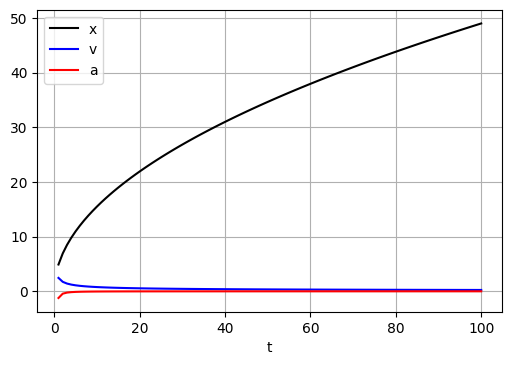

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

t = tf.linspace(start=1.0, stop=100.0, num=100)  # cfr np.linspace(1, 100, 100)
with tf.GradientTape() as outer_tape:
    outer_tape.watch(t)  # t is een constante tensor!
    with tf.GradientTape() as inner_tape:
        inner_tape.watch(t)  # t is een constante tensor!
        x = 4.9 * tf.sqrt(t)
    v = inner_tape.gradient(x, t)
a = outer_tape.gradient(v, t)

plt.plot(t, x, 'k-', t, v, 'b-', t, a, 'r-');
plt.xlabel('t');
plt.legend(['x', 'v', 'a']);
plt.grid();

`GradientTape` kan ook samengestelde functies differentiëren, bijv.:

> $z = cos(x^2)$

We weten dat de afgeleiden gelijk is aan:

> $\frac{dz}{dx}=-2x.sin(x^2)$

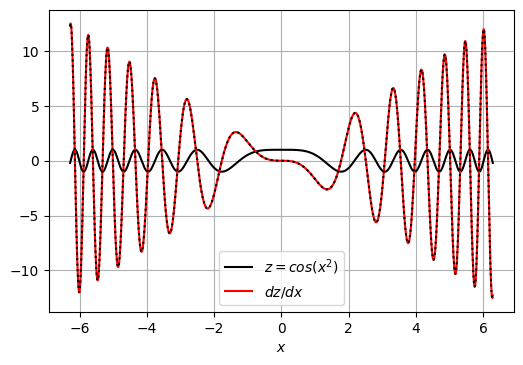

In [ ]:
x = tf.linspace(start=-2*np.pi, stop=2*np.pi, num=1000)
with tf.GradientTape() as tape:
    tape.watch(x)  # t is een constante tensor!
    z = tf.cos(tf.square(x))
dzdx = tape.gradient(z, x)

plt.plot(x, z, 'k-', # functie z
         x, dzdx, 'r-',  # afgeleide van z berekend met GradientTape
         x, -2*x*tf.sin(tf.square(x)), 'k:');  # analytisch berekende afgeleide van z
plt.xlabel('$x$');
plt.legend(['$z = cos(x^2)$', '$dz/dx$']);
plt.grid();

**Opdracht**

Neem de volgende veeltermfunctie:

> $y = \frac{1}{16}(231x^6-315x^4+105x^2-5)$

Maak een plot van deze functie over het interval $[-1, 1]$. Voeg onder deze plot een grafiek toe van de afgeleide $\frac{dy}{dx}$ van deze functie. Bereken deze afgeleide met de TensorFlow `GradientTape`.

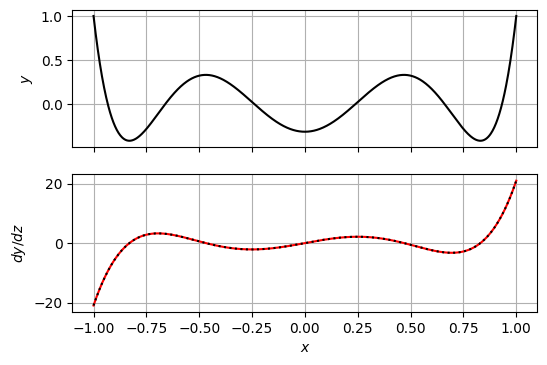

In [ ]:
x = tf.linspace(start=-1.0, stop=1.0, num=1000)
with tf.GradientTape() as tape:
    tape.watch(x)  # t is een constante tensor!
    y = (231.0 * x**6 - 315.0 * x**4 + 105.0 * x**2 - 5.0) / 16.0
dydx = tape.gradient(y, x)

_, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, y, 'k-'); # functie z
ax2.plot(x, dydx, 'r-',  # afgeleide van z berekend met GradientTape
         x, (231.0 * 6.0 * x**5 - 315.0 * 4.0 * x**3 + 105.0 * 2.0 * x) / 16, 'k:');  # analytisch berekende afgeleide van z
ax2.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax2.set_ylabel('$dy/dz$')
ax1.grid(); ax2.grid();

### An end-to-end example: a linear classifier in pure TensorFlow

Lineaire classifiers hebben we uitvoerig in het vak Machine Learning besproken: **perceptron** en **logistic regression**. Daar hebben we ook SGD toegepast om deze modellen te trainen en we hebben het algoritme zelf geïmplementeerd in NumPy. Hier doen we het in TensorFlow.

Eerst creëren we een fictieve dataset voor binaire classificatie:

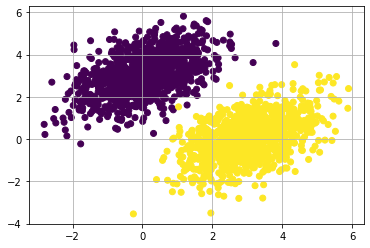

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack(
    (np.zeros((num_samples_per_class, 1), dtype="float32"),  # negatives = 0
     np.ones((num_samples_per_class, 1), dtype="float32"))   # positives = 1
)

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]);
plt.grid()

We starten met het initialiseren van de gewichten en de bias:

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))  # random numbers
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))  # nullen

print(W.numpy())  # Variable omzetten naar numpy array
print()
print(b.numpy())

[[0.3024168]
 [0.9128127]]

[0.]


De forward pass wordt als volgt gecodeerd:

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b  # dot(inputs, W) + b

Als lossfunctie nemen we de MSE (= mean squared error):

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)  # squared losses
    return tf.reduce_mean(per_sample_losses)  # gemiddelde

De functie voor één stap in de training loop zit er als volgt uit:

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)  # W -= grad(loss, W) * learning_rate
    b.assign_sub(grad_loss_wrt_b * learning_rate)  # b -= grad(loss, b) * learning_rate
    return loss

Bij het trainen passen we full batch SGD toe. D.w.z. dat we de gewichten updaten obv de volledige dataset ipv obv mini-batches:

In [ ]:
for step in range(50):  # we nemen 50 epochs
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.7258
Loss at step 1: 0.4070
Loss at step 2: 0.1666
Loss at step 3: 0.1297
Loss at step 4: 0.1179
Loss at step 5: 0.1098
Loss at step 6: 0.1026
Loss at step 7: 0.0961
Loss at step 8: 0.0901
Loss at step 9: 0.0846
Loss at step 10: 0.0796
Loss at step 11: 0.0750
Loss at step 12: 0.0708
Loss at step 13: 0.0670
Loss at step 14: 0.0635
Loss at step 15: 0.0603
Loss at step 16: 0.0573
Loss at step 17: 0.0546
Loss at step 18: 0.0522
Loss at step 19: 0.0499
Loss at step 20: 0.0478
Loss at step 21: 0.0459
Loss at step 22: 0.0442
Loss at step 23: 0.0426
Loss at step 24: 0.0412
Loss at step 25: 0.0398
Loss at step 26: 0.0386
Loss at step 27: 0.0375
Loss at step 28: 0.0365
Loss at step 29: 0.0355
Loss at step 30: 0.0347
Loss at step 31: 0.0339
Loss at step 32: 0.0332
Loss at step 33: 0.0325
Loss at step 34: 0.0319
Loss at step 35: 0.0314
Loss at step 36: 0.0309
Loss at step 37: 0.0304
Loss at step 38: 0.0300
Loss at step 39: 0.0296
Loss at step 40: 0.0292
Loss at step 41: 0.0289
Lo

We pltten het resultaat waarbij voorspellingen > 0.5 afgebeeld worden op 1 en de rest op 0. De classifier heeft dus de volgende vergelijking:

> $W_0 x + W_1 y + b = 0.5$

met $x$ en $y$ de 2 features. Hieruit kunnen we de vergelijking van de scheidende rechte afleiden:

> $y = -\frac{W_0}{W_1}x - \frac{b-0.5}{W_1}$

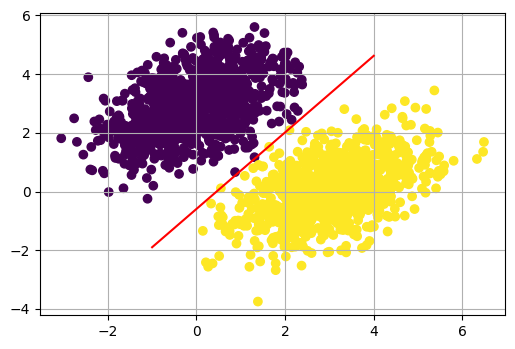

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]  # scheidende rechte
plt.plot(x, y, "-r");

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5);  # drempel = 0.5
plt.grid();

**OPDRACHT**

Implementeer Logistic Regression mbv TensorFlow. Gebruik dus de juiste TensorFlow functie als activatiefunctie. Voor de lossfunctie kan je ook gebruik maken van TensorFlow/Keras: https://www.tensorflow.org/api_docs/python/tf/keras/losses. Voorzie ook een methode om de nauwkeurigheid te berekenen: https://www.tensorflow.org/api_docs/python/tf/keras/metrics.

Werk niet met losse stukjes code, maar structureer alles in een klasse. Test je code uit op de dataset die hierboven werd gecreëerd.

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))  # random numbers
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))  # nullen

print(W.numpy())  # Variable omzetten naar numpy array
print()
print(b.numpy())

[[0.2672398]
 [0.4603361]]

[0.]


De forward pass wordt als volgt gecodeerd:

In [ ]:
def model(inputs):
    return tf.math.sigmoid(tf.matmul(inputs, W) + b)  # dot(inputs, W) + b

Als lossfunctie nemen we de MSE (= mean squared error):

In [ ]:
def binary_cross_entropy(targets, predictions):
    lossfunction = tf.keras.losses.BinaryCrossentropy()
    per_sample_losses = lossfunction(y_true=targets, y_pred=predictions)
    return tf.reduce_mean(per_sample_losses)  # gemiddelde

De functie voor één stap in de training loop zit er als volgt uit:

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = binary_cross_entropy(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)  # W -= grad(loss, W) * learning_rate
    b.assign_sub(grad_loss_wrt_b * learning_rate)  # b -= grad(loss, b) * learning_rate
    return loss

Bij het trainen passen we full batch SGD toe. D.w.z. dat we de gewichten updaten obv de volledige dataset ipv obv mini-batches:

In [ ]:
for step in range(50):  # we nemen 50 epochs
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.0221
Loss at step 1: 0.8466
Loss at step 2: 0.7025
Loss at step 3: 0.5883
Loss at step 4: 0.4999
Loss at step 5: 0.4322
Loss at step 6: 0.3800
Loss at step 7: 0.3392
Loss at step 8: 0.3067
Loss at step 9: 0.2803
Loss at step 10: 0.2584
Loss at step 11: 0.2401
Loss at step 12: 0.2245
Loss at step 13: 0.2110
Loss at step 14: 0.1992
Loss at step 15: 0.1889
Loss at step 16: 0.1797
Loss at step 17: 0.1715
Loss at step 18: 0.1640
Loss at step 19: 0.1573
Loss at step 20: 0.1512
Loss at step 21: 0.1456
Loss at step 22: 0.1405
Loss at step 23: 0.1357
Loss at step 24: 0.1313
Loss at step 25: 0.1273
Loss at step 26: 0.1235
Loss at step 27: 0.1199
Loss at step 28: 0.1166
Loss at step 29: 0.1135
Loss at step 30: 0.1106
Loss at step 31: 0.1079
Loss at step 32: 0.1053
Loss at step 33: 0.1028
Loss at step 34: 0.1005
Loss at step 35: 0.0983
Loss at step 36: 0.0962
Loss at step 37: 0.0942
Loss at step 38: 0.0923
Loss at step 39: 0.0905
Loss at step 40: 0.0887
Loss at step 41: 0.0871
Lo

We pltten het resultaat waarbij voorspellingen > 0.5 afgebeeld worden op 1 en de rest op 0. De classifier heeft dus de volgende vergelijking:

> $W_0 x + W_1 y + b = 0$

met $x$ en $y$ de 2 features. Hieruit kunnen we de vergelijking van de scheidende rechte afleiden:

> $y = -\frac{W_0}{W_1}x - \frac{b}{W_1}$

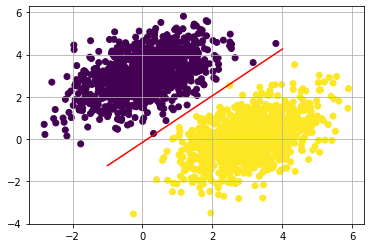

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x - b / W[1]  # scheidende rechte
plt.plot(x, y, "-r");

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5);  # drempel = 0.5
plt.grid();

In [ ]:
class LogisticRegression:

    def __init__(self, learning_rate=0.1, num_of_epochs=50, echo=True):
        self.learning_rate = learning_rate
        self.num_of_epochs = num_of_epochs
        self.echo = echo

    def __initialize(self):
        self._W = tf.Variable(initial_value=tf.random.uniform(shape=(self.__input_dim, self.__output_dim)))
        self._b = tf.Variable(initial_value=tf.zeros(shape=(self.__output_dim, )))

    def predict(self, inputs):
        return tf.math.sigmoid(tf.matmul(inputs, self._W) + self._b)  # sigmoid(dot(inputs, W) + b

    def binary_cross_entropy(self, targets, predictions):
        lossfunction = tf.keras.losses.BinaryCrossentropy()
        per_sample_losses = lossfunction(y_true=targets, y_pred=predictions)
        return tf.reduce_mean(per_sample_losses)

    def __training_step(self):
        with tf.GradientTape() as tape:
            predictions = self.predict(self.inputs)
            loss = self.binary_cross_entropy(self.targets, predictions)
        grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [self._W, self._b])
        self._W.assign_sub(grad_loss_wrt_W * self.learning_rate)  # W -= grad(loss, W) * learning_rate
        self._b.assign_sub(grad_loss_wrt_b * self.learning_rate)  # b -= grad(loss, b) * learning_rate
        return loss

    def fit(self, inputs, targets):
        self.inputs, self.targets = inputs, targets
        self.nsamples, self.__input_dim = inputs.shape
        self.__output_dim = targets.shape[1]
        self.__initialize()
        self.losses = []
        for step in range(self.num_of_epochs):
            loss = self.__training_step()
            self.losses.append(loss)
            if self.echo: print(f"Loss at step {step}: {loss:.4f}")

    def score(self, targets, predictions):
        metric = tf.keras.metrics.BinaryAccuracy()
        return metric(y_true=targets, y_pred=predictions).numpy()

In [ ]:
lr = LogisticRegression()
lr.fit(inputs, targets)
print('Accuracy:', lr.score(targets, lr.predict(inputs)))

Loss at step 0: 0.8984
Loss at step 1: 0.7475
Loss at step 2: 0.6225
Loss at step 3: 0.5223
Loss at step 4: 0.4439
Loss at step 5: 0.3834
Loss at step 6: 0.3366
Loss at step 7: 0.3001
Loss at step 8: 0.2713
Loss at step 9: 0.2481
Loss at step 10: 0.2291
Loss at step 11: 0.2133
Loss at step 12: 0.1999
Loss at step 13: 0.1884
Loss at step 14: 0.1785
Loss at step 15: 0.1698
Loss at step 16: 0.1621
Loss at step 17: 0.1552
Loss at step 18: 0.1491
Loss at step 19: 0.1435
Loss at step 20: 0.1384
Loss at step 21: 0.1337
Loss at step 22: 0.1294
Loss at step 23: 0.1255
Loss at step 24: 0.1218
Loss at step 25: 0.1184
Loss at step 26: 0.1152
Loss at step 27: 0.1122
Loss at step 28: 0.1094
Loss at step 29: 0.1068
Loss at step 30: 0.1043
Loss at step 31: 0.1020
Loss at step 32: 0.0998
Loss at step 33: 0.0977
Loss at step 34: 0.0957
Loss at step 35: 0.0938
Loss at step 36: 0.0920
Loss at step 37: 0.0903
Loss at step 38: 0.0886
Loss at step 39: 0.0870
Loss at step 40: 0.0855
Loss at step 41: 0.0841
Lo

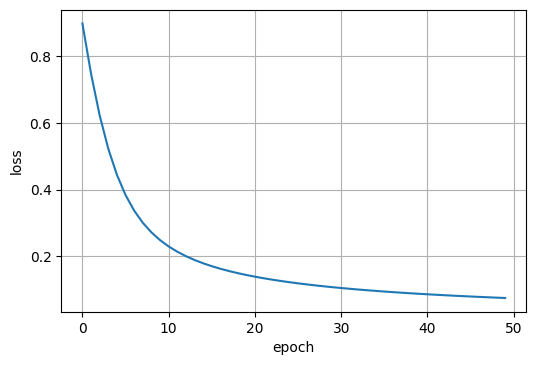

In [ ]:
plt.plot(lr.losses);
plt.xlabel('epoch');
plt.ylabel('loss');
plt.grid();

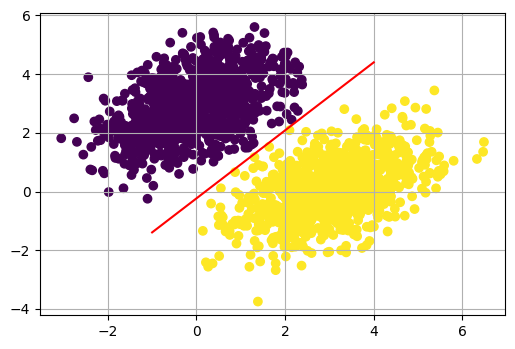

In [ ]:
x = np.linspace(-1, 4, 100)
y = - lr._W[0] / lr._W[1] * x - lr._b / lr._W[1]  # scheidende rechte - pas op! Hier geen (0.5 - b)!
plt.plot(x, y, "-r");

predictions = lr.predict(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5);  # drempel = 0.5
plt.grid();

**OPDRACHT**

Werkt je code ook voor de Halloween Candy dataset?

Lees deze dataset in en test uit door te classificeren obv feature 'chocolate'.

Vergelijk je resultaat met het Scikit-Learn algoritme.

In [ ]:
import pandas as pd
candy = pd.read_csv("candy-data.csv")
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
columns = list(candy.columns)
X = candy[columns[2:]].values.astype('float32')
X[:, -1] /= 100
y = candy[[columns[1]]].values.astype('float32')

In [ ]:
m = LogisticRegression(learning_rate=5, num_of_epochs=1000, echo=False)
m.fit(X, y)
print('Accuracy:', m.score(y, m.predict(X)))

Accuracy: 0.9529412


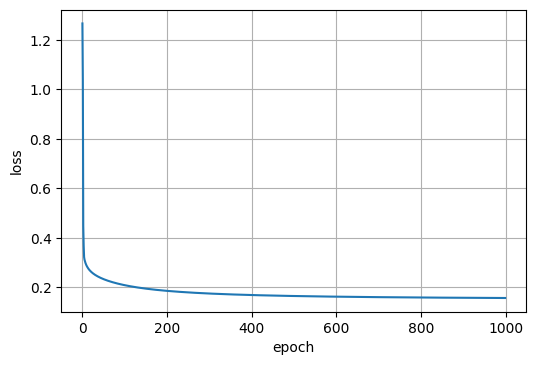

In [ ]:
plt.plot(m.losses);
plt.xlabel('epoch');
plt.ylabel('loss');
plt.grid();

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
sk = LR(penalty='none')
sk.fit(X, y.flatten())
sk.score(X, y.flatten())

0.9647058823529412

## 3.6. Anatomy of a neural network: understanding core Keras APIs

Deze code demonstreert hoe Keras modellen (= neurale netwerken) zijn opgebouwd adhv lagen. Een laag (Engels: layer) is de belangrijkste structuur in Keras, want alles is een `Layer` of interageert met layers. De "traditionele" laag is een `Dense` layer, een volledig geconnecteerde laag. Hieronder volgt een eenvoudige implementatie van deze klasse.

In [ ]:
import tensorflow as tf
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        # units = aantal cellen = output size
        # activation = tensorflow activatiefunctie
        super().__init__()
        self.units = units
        self.activation = activation
        self.built = False

    def build(self, input_shape):
        # initialiseert de parameters W en b
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,), initializer="zeros")

    def call(self, inputs):
        # forward loop: activation(dot(input, W) + b)
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
              y = self.activation(y)
        return y

    def __call__(self, inputs):
        # zorgt ervoor dat het object als functie kan aangeroepen worden
        # zie Python documentatie: https://docs.python.org/3/reference/datamodel.html
        if not self.built:
            self.build(inputs.shape)
            self.built = True
        return self.call(inputs)

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)  # instantiatie
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)  # dankzij __call__ kan object als functie aangeroepen worden
print(output_tensor.shape)  # output_tensor.shape[1] = my_dense.units = 32

(2, 32)


De eenvoudigste deep learning modellen bestaan uit een opeenvolging van lagen. In Keras gebruiken we hiervoor de `Sequantial` klasse, een subklasse van `Model`. Doordat methode `__call__()` de shape van de input automatisch in rekening brengt, hoeven we die niet mee te geven.

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation=tf.nn.relu),
    SimpleDense(64, activation=tf.nn.relu),
    SimpleDense(32, activation=tf.nn.relu),
    SimpleDense(10, activation=tf.nn.softmax)
])